# Crunchbase VC Data Analysis

## Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Blues_r')

## Get the Data / Basic Exploration 

In [4]:
df = pd.read_excel('Dataset.xlsx',index_col=None)

In [5]:
df.head()

,Organization Name,Organization Name URL,Headquarters Location,Industries,Last Funding Type,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Number of Employees,...,Price Currency,Company Type,Founded Date,Twitter,Facebook,LinkedIn,Funding Status,Acquisition Type,Announced Date,Estimated Revenue Range
0,216,https://www.crunchbase.com/organization/216,"The Hague, Zuid-Holland, The Netherlands","B2B, Consulting, Financial Services, Informati...",NaN,NaT,NaN,NaN,NaN,51-100,...,NaN,For Profit,2015-01-01,https://twitter.com/216mkb,https://www.facebook.com/pg/216MKB,https://www.linkedin.com/company/9380675/,M&A,Acquisition,2015-04-01,$10M to $50M
1,605,https://www.crunchbase.com/organization/605,"New York, New York, United States","Advertising Platforms, Analytics, Artificial I...",NaN,NaT,NaN,NaN,NaN,51-100,...,NaN,For Profit,2016-11-01,https://www.twitter.com/605data,https://www.facebook.com/605data,https://www.linkedin.com/company/605data,NaN,NaN,NaT,$1M to $10M
2,1620,https://www.crunchbase.com/organization/1620-w...,"Newburyport, Massachusetts, United States","Fashion, Lifestyle",NaN,NaT,NaN,NaN,NaN,2020-01-10 00:00:00,...,NaN,For Profit,2016-08-24,NaN,NaN,NaN,NaN,NaN,NaT,Less than $1M
3,&ME,https://www.crunchbase.com/organization/merhak...,"Bangalore, Karnataka, India","Food and Beverage, Food Processing, Nutrition",Venture - Series Unknown,2019-03-12,NaN,NaN,NaN,1950-11-01 00:00:00,...,NaN,For Profit,2017-09-27,https://twitter.com/andmeindia,https://www.facebook.com/andme.in/,https://www.linkedin.com/company/27206722/,NaN,NaN,NaT,$1M to $10M
4,&shift,https://www.crunchbase.com/organization/shift-10,NaN,"Information Technology, Internet, Social Media...",NaN,NaT,NaN,NaN,NaN,2020-01-10 00:00:00,...,NaN,NaN,2015-05-01,https://www.twitter.com/andshift_fr,https://www.facebook.com/andshift,NaN,NaN,NaN,NaT,Less than $1M


In [6]:
df.drop(['Twitter', 'Facebook', 'LinkedIn', 'Organization Name URL', 'Headquarters Location', 'Last Funding Amount', 'Last Funding Amount Currency', 'Total Funding Amount', 'Total Funding Amount Currency', 'Acquired by', 'Acquired by URL', 'Acquisition Price', 'Price Currency', 'Announced Date', 'Unnamed: 20'], axis=1, inplace=True)


In [7]:
df.head()

,Organization Name,Industries,Last Funding Type,Last Funding Date,Last Funding Amount Currency (in USD),Number of Employees,Total Funding Amount Currency (in USD),Number of Funding Rounds,Acquisition Status,Number of Acquisitions,Acquisition Price Currency (in USD),Number of Founders,Company Type,Founded Date,Funding Status,Acquisition Type,Estimated Revenue Range
0,216,"B2B, Consulting, Financial Services, Informati...",NaN,NaT,NaN,51-100,NaN,NaN,Was Acquired,NaN,NaN,NaN,For Profit,2015-01-01,M&A,Acquisition,$10M to $50M
1,605,"Advertising Platforms, Analytics, Artificial I...",NaN,NaT,NaN,51-100,NaN,NaN,NaN,NaN,NaN,2.0,For Profit,2016-11-01,NaN,NaN,$1M to $10M
2,1620,"Fashion, Lifestyle",NaN,NaT,NaN,2020-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,2.0,For Profit,2016-08-24,NaN,NaN,Less than $1M
3,&ME,"Food and Beverage, Food Processing, Nutrition",Venture - Series Unknown,2019-03-12,NaN,1950-11-01 00:00:00,NaN,2.0,NaN,NaN,NaN,1.0,For Profit,2017-09-27,NaN,NaN,$1M to $10M
4,&shift,"Information Technology, Internet, Social Media...",NaN,NaT,NaN,2020-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,NaN,NaN,Less than $1M


In [8]:
df['Organization Name'] = df['Organization Name'].str.strip()

In [9]:
df['Organization Name'] = df['Organization Name'].str.replace(r"\(.*\)","")

<ipython-input-9-3f58c95d9882>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Organization Name'] = df['Organization Name'].str.replace(r"\(.*\)","")


In [10]:
df.rename(columns = {'Last Funding Amount Currency (in USD)':'Last Funding Amount', 'Total Funding Amount Currency (in USD)':'Total Funding Amount', 'Acquisition Price Currency (in USD)':'Acquisition Price'}, inplace = True)

In [11]:
df.head()

,Organization Name,Industries,Last Funding Type,Last Funding Date,Last Funding Amount,Number of Employees,Total Funding Amount,Number of Funding Rounds,Acquisition Status,Number of Acquisitions,Acquisition Price,Number of Founders,Company Type,Founded Date,Funding Status,Acquisition Type,Estimated Revenue Range
0,NaN,"B2B, Consulting, Financial Services, Informati...",NaN,NaT,NaN,51-100,NaN,NaN,Was Acquired,NaN,NaN,NaN,For Profit,2015-01-01,M&A,Acquisition,$10M to $50M
1,NaN,"Advertising Platforms, Analytics, Artificial I...",NaN,NaT,NaN,51-100,NaN,NaN,NaN,NaN,NaN,2.0,For Profit,2016-11-01,NaN,NaN,$1M to $10M
2,NaN,"Fashion, Lifestyle",NaN,NaT,NaN,2020-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,2.0,For Profit,2016-08-24,NaN,NaN,Less than $1M
3,&ME,"Food and Beverage, Food Processing, Nutrition",Venture - Series Unknown,2019-03-12,NaN,1950-11-01 00:00:00,NaN,2.0,NaN,NaN,NaN,1.0,For Profit,2017-09-27,NaN,NaN,$1M to $10M
4,&shift,"Information Technology, Internet, Social Media...",NaN,NaT,NaN,2020-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,NaN,NaN,Less than $1M


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Organization Name         21524 non-null  object        
 1   Industries                21360 non-null  object        
 2   Last Funding Type         12473 non-null  object        
 3   Last Funding Date         12473 non-null  datetime64[ns]
 4   Last Funding Amount       9924 non-null   float64       
 5   Number of Employees       19980 non-null  object        
 6   Total Funding Amount      11038 non-null  float64       
 7   Number of Funding Rounds  12473 non-null  float64       
 8   Acquisition Status        1066 non-null   object        
 9   Number of Acquisitions    731 non-null    float64       
 10  Acquisition Price         53 non-null     float64       
 11  Number of Founders        16119 non-null  float64       
 12  Company Type      

In [13]:
df.describe()

,Last Funding Amount,Total Funding Amount,Number of Funding Rounds,Number of Acquisitions,Acquisition Price,Number of Founders
count,9.924000e+03,1.103800e+04,12473.000000,731.000000,5.300000e+01,16119.000000
mean,1.218798e+07,1.967612e+07,2.309549,1.454172,3.949920e+08,1.997829
std,4.751057e+07,9.479053e+07,1.479869,1.213630,7.533893e+08,1.050792
min,1.000000e+03,1.000000e+03,1.000000,1.000000,1.440760e+06,0.000000
25%,6.874405e+05,9.700000e+05,1.000000,1.000000,3.006000e+07,1.000000
50%,2.509196e+06,3.307082e+06,2.000000,1.000000,1.700000e+08,2.000000
75%,9.106738e+06,1.200000e+07,3.000000,1.000000,4.500000e+08,3.000000
max,2.600000e+09,4.100000e+09,14.000000,17.000000,4.900000e+09,10.000000


In [14]:
df['Industries'].count()

21360

<AxesSubplot:xlabel='count', ylabel='Last Funding Type'>

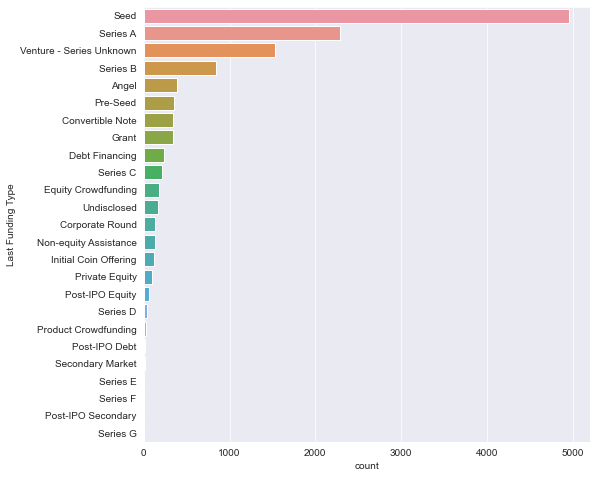

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, y='Last Funding Type', order = df['Last Funding Type'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Number of Funding Rounds'>

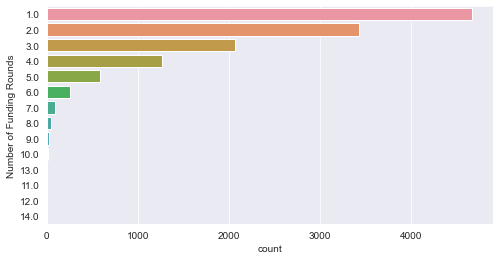

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='Number of Funding Rounds', order = df['Number of Funding Rounds'].value_counts().index)

(-100.0, 200000000.0)

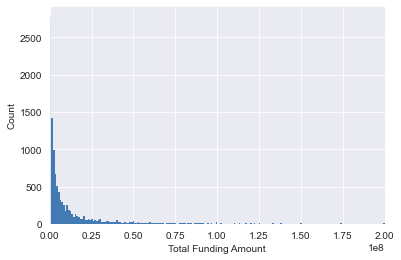

In [17]:
sns.histplot(data=df, x='Total Funding Amount')
plt.xlim(-100, 2e+08)

## Data Cleanning

**Drop Useless Columns**

<AxesSubplot:>

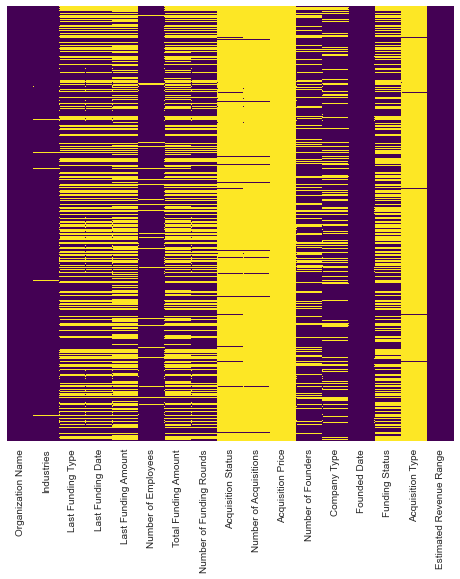

In [18]:
plt.figure(figsize = (8,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
df.drop(['Acquisition Status', 'Number of Acquisitions', 'Acquisition Price', 'Funding Status', 'Acquisition Type'], axis =1, inplace = True)

In [20]:
df = df[df['Total Funding Amount'].notnull()]

In [21]:
df = df[df['Number of Funding Rounds']<7]

<AxesSubplot:>

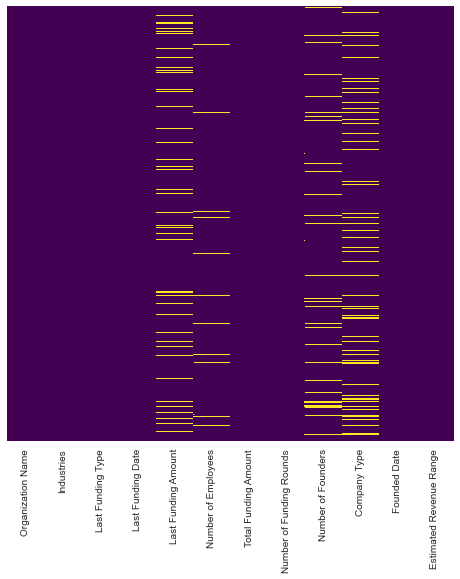

In [22]:
plt.figure(figsize = (8,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Mean Imputation by Num of Funding Rounds**

In [23]:
mean_list = []
for i in range(1,7):
    mean_list.append(df[df['Number of Funding Rounds']==i]['Last Funding Amount'].mean())
mean_list

[8886154.252207506,
 11214002.573518654,
 12351399.398230089,
 16203785.12813102,
 20855695.498929337,
 22326589.78773585]

In [24]:
def impute(cols):
    NFR = cols[0]
    LFA = cols[1]
    
    if pd.isnull(LFA):

        if NFR == 1:
            return mean_list[0]

        elif NFR == 2:
            return mean_list[1]

        elif NFR == 3:
            return mean_list[2]
        
        elif NFR == 4:
            return mean_list[3]
        
        elif NFR == 5:
            return mean_list[4]
        
        else:
            return mean_list[5]
        
    else:
        return LFA

In [25]:
df['Last Funding Amount'] = df[['Number of Funding Rounds', 'Last Funding Amount']].apply(impute, axis=1)

<AxesSubplot:>

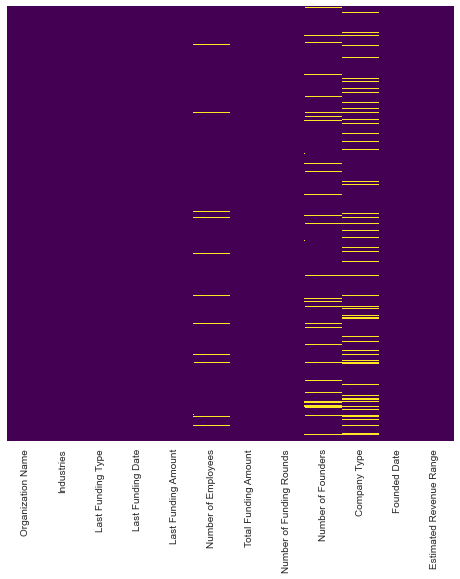

In [26]:
plt.figure(figsize = (8,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Correlation Analysis

In [27]:
dfn = df[['Last Funding Amount', 'Total Funding Amount', 'Estimated Revenue Range', 'Number of Founders', 'Number of Funding Rounds']]

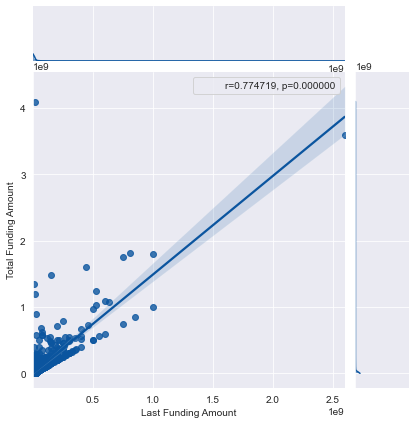

In [28]:
import scipy.stats as stats
graph = sns.jointplot(x='Last Funding Amount', y='Total Funding Amount', data = df, kind='reg')
r, p = stats.pearsonr(df['Last Funding Amount'], df['Total Funding Amount'])
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

<AxesSubplot:xlabel='Number of Founders', ylabel='Total Funding Amount'>

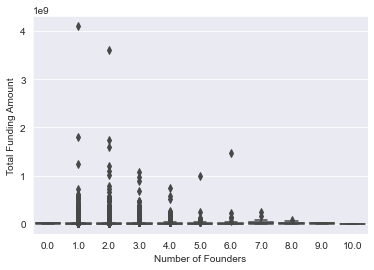

In [29]:
sns.boxplot(x='Number of Founders', y='Total Funding Amount', data=df)

In [30]:
for i in range(0,11):
    print(i, (df[df['Number of Founders']==i]['Total Funding Amount'].var()))

0 288000000000000.0
1 9336981233350456.0
2 7518856362306503.0
3 2905352453790172.0
4 2514014790236207.5
5 5362577197766831.0
6 3.3125439056366864e+16
7 4475171809940351.0
8 728487406855964.2
9 380880000000000.0
10 nan


In [35]:
F, p = stats.f_oneway(df[df['Number of Founders']==1]['Total Funding Amount'],
                      df[df['Number of Founders']==2]['Total Funding Amount'],
                      df[df['Number of Founders']==3]['Total Funding Amount'],
                     df[df['Number of Founders']==4]['Total Funding Amount'],
                     df[df['Number of Founders']==5]['Total Funding Amount'],
                     df[df['Number of Founders']==6]['Total Funding Amount'],
                      df[df['Number of Founders']==7]['Total Funding Amount'],
                      df[df['Number of Founders']==8]['Total Funding Amount'],
                      df[df['Number of Founders']==9]['Total Funding Amount'],
                     )
print("F: ", F, "p: ", p)
#Number of Founders don't have correlation with Total Funding Amount
#The assumption of Anova test doesn't really met

F:  0.9144616488576198 p:  0.5030360757614798


## Regression Analysis

**Creating and Train the Model**

In [169]:
dfn=dfn.dropna()

In [170]:
from sklearn.model_selection import train_test_split

In [179]:
X = dfn.drop(['Total Funding Amount', 'Estimated Revenue Range', 'Number of Founders'], axis = 1)
y = dfn['Total Funding Amount']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [181]:
from sklearn.linear_model import LinearRegression

In [182]:
lm = LinearRegression()

In [183]:
lm.fit(X_train, y_train)

LinearRegression()

In [184]:
# print the intercept
print(lm.intercept_)

-9222371.430312175


In [185]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Last Funding Amount,1.480073e+00
Number of Funding Rounds,4.202198e+06


In [186]:
predictions = lm.predict(X_test)

**Predictions from Model**

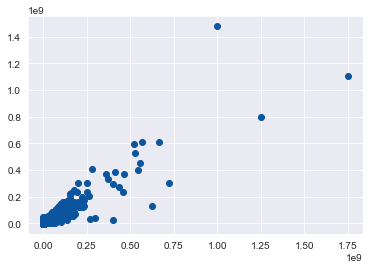

In [187]:
plt.scatter(y_test,predictions)

**Residual Histogram**

(-100000000.0, 100000000.0)

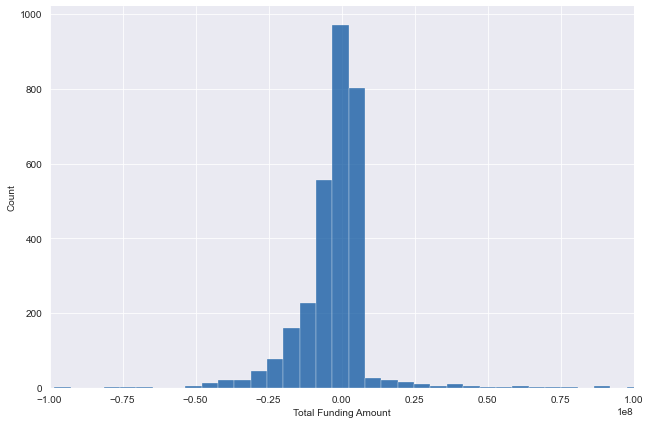

In [188]:
sns.displot((y_test-predictions),bins=200, height = 6, aspect = 1.5)
plt.xlim(-1e+08, 1e+08)

**Regression Evaluation Metrics**

In [189]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [190]:
print('R Square:', r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R Square: 0.8117875705983106
MAE: 8985725.06512324
MSE: 734222102513031.2
RMSE: 27096533.034929603
